## Import Libraries

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

## Data Gathering

In [2]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory Data Analysis(EDA)

In [5]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [6]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [7]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [8]:
df['sex'].replace({'female':0, 'male':1}, inplace=True)

In [9]:
sex_value = {'female':0, 'male':1}
sex_value

{'female': 0, 'male': 1}

In [10]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [11]:
df['bmi'].isna().sum()

0

In [12]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [13]:
df['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [15]:
df['smoker'].replace({"yes":0, "no":1}, inplace=True)

In [16]:
smoker_value = {"yes":0, "no":1}
smoker_value

{'yes': 0, 'no': 1}

In [17]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [19]:
df['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [20]:
# use One hot encoding

df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


# Feature Engineering

<AxesSubplot:>

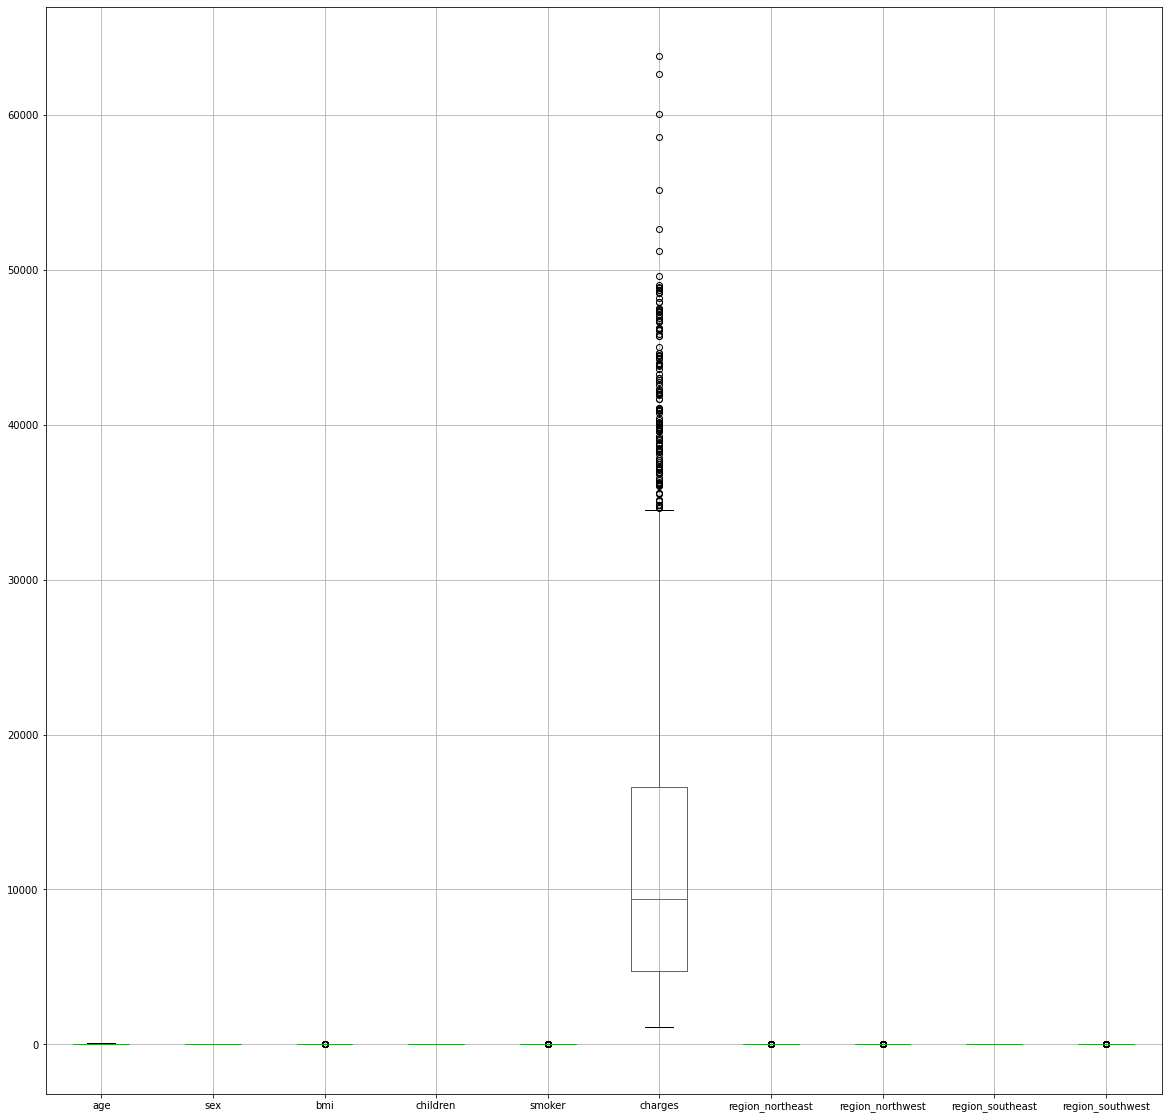

In [22]:
plt.figure(figsize=(20,20))
df.boxplot()

## Age

<AxesSubplot:>

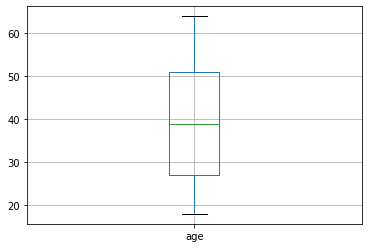

In [23]:
df[['age']].boxplot()

## Sex

<AxesSubplot:>

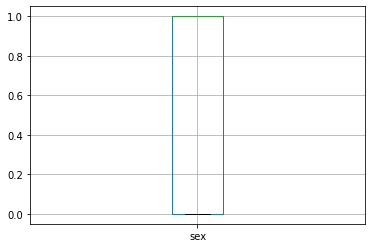

In [24]:
df[['sex']].boxplot()

## BMI

<AxesSubplot:>

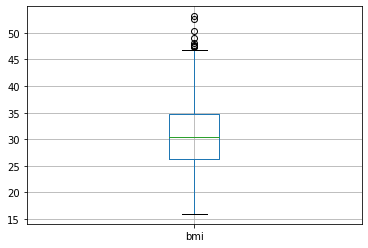

In [25]:
df[['bmi']].boxplot()

In [26]:
q1=df['bmi'].quantile(0.25)
q2=df['bmi'].quantile(0.50)
q3=df['bmi'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q2-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

q1--> 26.29625
q2--> 30.4
q2--> 34.69375
upper_tail--> 47.290000000000006
lower_tail--> 13.7


In [27]:
df[['bmi']].loc[df['bmi']>upper_tail]

,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38
860,47.60
1047,52.58
1088,47.74
1317,53.13


In [28]:
df[['bmi']].loc[df['bmi']<lower_tail]

,bmi


In [29]:
df['bmi'].mean()

30.66339686098655

In [30]:
df['bmi'].median()

30.4

In [31]:
bmi_df=df[['bmi']].loc[(df['bmi'] < upper_tail) & 
                                   (df['bmi'] > lower_tail)].median()[0]
bmi_df                                               

30.3

In [32]:
df.loc[(df['bmi'] > upper_tail) |
       (df['bmi'] < lower_tail), 'bmi']=upper_tail

In [33]:
df[['bmi']].loc[df['bmi']<lower_tail]

,bmi


In [34]:
df[['bmi']].loc[df['bmi']>upper_tail]

,bmi


<AxesSubplot:>

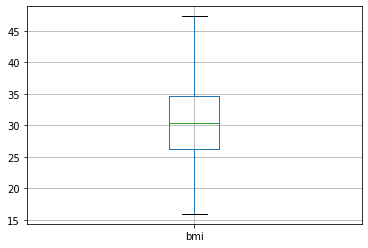

In [35]:
df[['bmi']].boxplot()

## children

<AxesSubplot:>

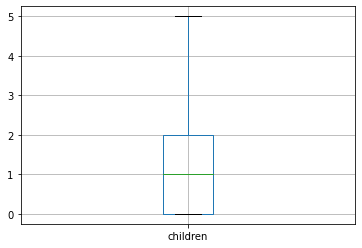

In [36]:
df[['children']].boxplot()

## Smoker

<AxesSubplot:>

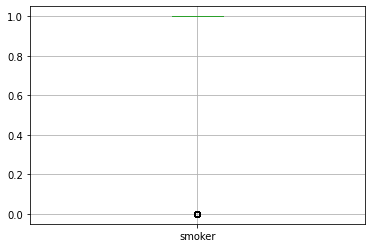

In [37]:
df[['smoker']].boxplot()

In [38]:
q1=df['smoker'].quantile(0.25)
q2=df['smoker'].quantile(0.50)
q3=df['smoker'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q2-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

q1--> 1.0
q2--> 1.0
q2--> 1.0
upper_tail--> 1.0
lower_tail--> 1.0


In [39]:
df[['smoker']].loc[df['smoker']>upper_tail]

,smoker


In [40]:
df[['smoker']].loc[df['smoker']<lower_tail]

,smoker
0,0
11,0
14,0
19,0
23,0
...,...
1313,0
1314,0
1321,0
1323,0


In [41]:
df['smoker'].mean()

0.7952167414050823

In [42]:
df['smoker'].median()

1.0

In [43]:
smoker_df=df[['smoker']].loc[(df['smoker'] < upper_tail) & 
                                   (df['smoker'] > lower_tail)].median()[0]
smoker_df                                               

nan

In [44]:
df.loc[(df['smoker'] > upper_tail) |
       (df['smoker'] < lower_tail), 'smoker']=lower_tail

In [45]:
df[['smoker']].loc[df['smoker']<lower_tail]

,smoker


In [46]:
df[['smoker']].loc[df['smoker']>upper_tail]

,smoker


<AxesSubplot:>

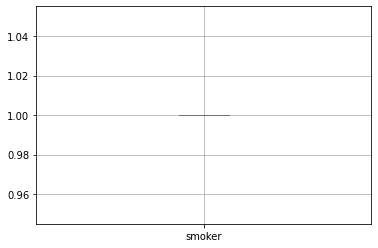

In [47]:
df[['smoker']].boxplot()

# Model Training

In [48]:
x = df.drop('charges',axis=1)

y = df['charges']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

### to create the instance of model

In [50]:
medical_insurance_model=LinearRegression()

In [51]:
medical_insurance_model.fit(x_train,y_train)

LinearRegression()

In [52]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
216,53,0,26.600,0,1,0,1,0,0
731,53,1,21.400,1,1,0,0,0,1
866,18,1,37.290,0,1,0,0,1,0
202,60,0,24.035,0,1,0,1,0,0
820,45,1,33.700,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
715,60,1,28.900,0,1,0,0,0,1
905,26,0,29.355,2,1,1,0,0,0
1096,51,0,34.960,2,1,1,0,0,0
235,40,0,22.220,2,1,0,0,1,0


In [53]:
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
559,19,1,35.530,0,1,0,1,0,0
1087,57,1,31.540,0,1,0,1,0,0
1020,51,1,37.000,0,1,0,0,0,1
460,49,0,36.630,3,1,0,0,1,0
802,21,1,22.300,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
682,39,1,35.300,2,1,0,0,0,1
629,44,0,38.950,0,1,0,1,0,0
893,47,1,38.940,2,1,0,0,1,0
807,19,0,36.575,0,1,0,1,0,0


# Metric Evalution

In [54]:
y_pred_test = medical_insurance_model.predict(x_test)

In [55]:
# testing data
y_pred_test = medical_insurance_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print('mse-->',mse)
rmse = np.sqrt(mse)
print('rmse-->',rmse)
mae = mean_absolute_error(y_test,y_pred_test)
print('mae-->',mae)
r2 = r2_score(y_test,y_pred_test)
print('r2 score-->',r2)

mse--> 127547226.01786317
rmse--> 11293.680800246799
mae--> 8805.92671795366
r2 score--> 0.14558762374711975


In [56]:
# training data
y_pred_train = medical_insurance_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print('mse-->',mse)
rmse = np.sqrt(mse)
print('rmse-->',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae-->',mae)
r2 = r2_score(y_train,y_pred_train)
print('r2 score-->',r2)

mse--> 128389571.33048473
rmse--> 11330.912202046433
mae--> 9007.386589019112
r2 score--> 0.11970849169505726


# Testing on Single Row

In [57]:
column_names = x.columns
len(column_names)

9

In [58]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [59]:
# Testing on Single Row
column_names = x.columns
len(column_names)
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [60]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [61]:
age = 55  #26
sex = "female"
bmi = 26.3 #24.5
children = 2
smoker = "no"
region = "northeast"

# charges = ?

In [62]:
print(sex_value)
print(smoker_value)
print(column_names)

{'female': 0, 'male': 1}
{'yes': 0, 'no': 1}
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [63]:
medical_insurance_encoding_col = {"sex":sex_value, "smoker":smoker_value, "columns":list(column_names)}
medical_insurance_encoding_col

{'sex': {'female': 0, 'male': 1},
 'smoker': {'yes': 0, 'no': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [65]:
medical_insurance_encoding_col['smoker'][smoker]

1

In [68]:
medical_insurance_encoding_col['sex'][sex]

0

In [69]:
region = "region_" + region
region

'region_northeast'

In [79]:
region_index = np.where(column_names == region)[0][0]
region_index

5

In [71]:
array = np.zeros(len(column_names), dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
array[0]=age
array[1]=medical_insurance_encoding_col['sex'][sex]
array[2]=bmi
array[3]=children
array[4]=medical_insurance_encoding_col['smoker'][smoker]

array[region_index] = 1

array

array([55. ,  0. , 26.3,  2. ,  1. ,  1. ,  0. ,  0. ,  0. ])

In [76]:
predicted_insurance_charge = medical_insurance_model.predict([array])[0]  # 2 D
print("Predicted insurance charge :",predicted_insurance_charge, "rupees")  #8166.76

Predicted insurance charge : 16139.500326044104 rupees


In [77]:
# Save Model in Pickle File
import pickle

with open("medical_insurance_model.pkl", "wb") as f:
    pickle.dump(medical_insurance_model, f)

In [78]:
# Store all this values in JSON

import json

with open("medical_insurance_encoding_col.json", "w") as f:
    json.dump(medical_insurance_encoding_col, f)